Feature preview:
        date  price  price_previous  pct_change    ma_5
4 1987-05-26  18.63           18.60    0.001613  18.572
5 1987-05-27  18.60           18.63   -0.001610  18.566
6 1987-05-28  18.60           18.60    0.000000  18.596
7 1987-05-29  18.58           18.60   -0.001075  18.602
8 1987-06-01  18.65           18.58    0.003767  18.612


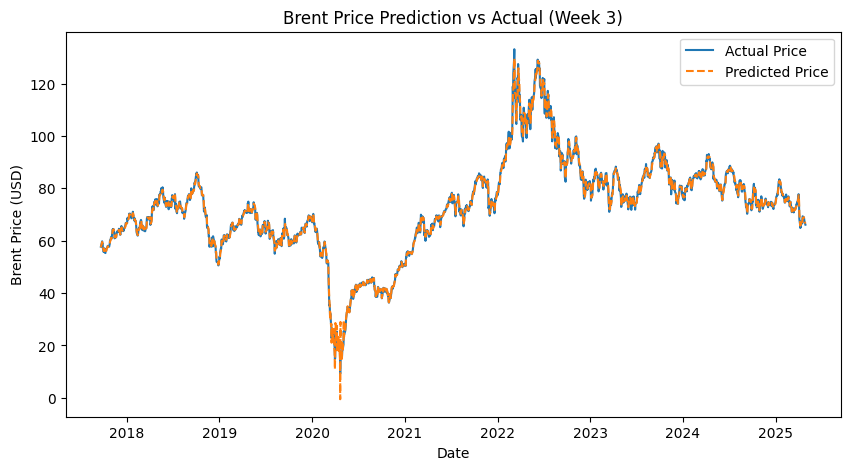

Mean Absolute Error: 0.6192256645663947
Model coefficients: [ 0.90245905 37.66847453  0.0975199 ]
Model intercept: -0.008880032341842536


In [1]:
# Brent Price Predictor - Week 3: Adding Engineered Features

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 1: Load data
url = "https://raw.githubusercontent.com/datasets/oil-prices/master/data/brent-daily.csv"
df = pd.read_csv(url)

# Step 2: Clean data
df.rename(columns={'Date': 'date', 'Price': 'price'}, inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Step 3: Create features

# Previous day's price
df['price_previous'] = df['price'].shift(1)

# Percentage change from previous day
df['pct_change'] = df['price'].pct_change()

# 5-day moving average
df['ma_5'] = df['price'].rolling(window=5).mean()

# Step 4: Drop rows with NaN values (caused by shifting and rolling)
df = df.dropna()

print("Feature preview:")
print(df.head())

# Step 5: Define input features (X) and target (y)
X = df[['price_previous', 'pct_change', 'ma_5']].values
y = df['price'].values

# Step 6: Split data into train/test sets
split_point = int(len(df) * 0.8)
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# Step 7: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Plot results
plt.figure(figsize=(10,5))
plt.plot(df['date'][split_point:], y_test, label='Actual Price')
plt.plot(df['date'][split_point:], y_pred, label='Predicted Price', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Brent Price (USD)')
plt.legend()
plt.title('Brent Price Prediction vs Actual (Week 3)')
plt.show()

# Step 10: Evaluate model
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Optional: Print learned coefficients and intercept
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)
